In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
!pip install pandas scikit-learn matplotlib
import pandas as pd


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
df = pd.read_csv('df_cleaned.csv')

# Pivot the data
pivot_df = df.pivot_table(index='STD_NO', columns='COURSE_ID', values='AVG', aggfunc='first').reset_index()

# Fill missing values with 0 or any other suitable value
pivot_df = pivot_df.fillna(0)
pivot_df.columns = ['{}_{}'.format(col[0], col[1]) if isinstance(col, tuple) and col[1] != '' else col for col in pivot_df.columns]
print(pivot_df)


     STD_NO  11102  11103  11151  11206  11212  11253  11313  11323  11335  \
0    313134   35.0    0.0    0.0   35.0    0.0   50.0    0.0    0.0    0.0   
1    318942    0.0    0.0    0.0   51.0   50.0   51.0   50.0   55.0   55.0   
2    324629   54.0   70.0   80.0   61.0   54.0   62.0   52.0   65.0   50.0   
3    325080   54.0   51.0   69.0   70.0   68.0   98.0    0.0   72.0   60.0   
4    325113   35.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
350  381169   63.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
351  381290   75.0   59.0   72.0    0.0    0.0    0.0    0.0    0.0    0.0   
352  381312   35.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
353  381873   58.0   35.0   50.0    0.0    0.0    0.0    0.0    0.0    0.0   
354  382049   71.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  31255  31260  31261  31264  31271  31311  31351  3135

In [21]:
pivot_df

,STD_NO,11102,11103,11151,11206,11212,11253,11313,11323,11335,...,31255,31260,31261,31264,31271,31311,31351,31352,31361,31373
0,313134,35.0,0.0,0.0,35.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0
1,318942,0.0,0.0,0.0,51.0,50.0,51.0,50.0,55.0,55.0,...,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,35.0
2,324629,54.0,70.0,80.0,61.0,54.0,62.0,52.0,65.0,50.0,...,0.0,0.0,0.0,0.0,77.0,76.0,0.0,0.0,0.0,0.0
3,325080,54.0,51.0,69.0,70.0,68.0,98.0,0.0,72.0,60.0,...,92.0,0.0,0.0,0.0,78.0,78.0,0.0,0.0,67.0,0.0
4,325113,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,53.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,381169,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351,381290,75.0,59.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,381312,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,381873,58.0,35.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
high_school_df=pd.read_csv("high_school_df_cleaned.csv")

In [23]:
high_school_df

,STD_NO,MAJOR_EDESC,GENDER_EDESC,TAWJIH_COUNTRY,TAWJIH_GPA,TAWJIH_BRANCH
0,313134,Data Science & Artificial Intelligence,Male,Jordan,86,GCE Sci
1,328490,Data Science & Artificial Intelligence,Male,Jordan,87,Scientific
2,328644,Data Science & Artificial Intelligence,Male,Jordan,84,Scientific
3,329359,Data Science & Artificial Intelligence,Male,Jordan,76,GCE Sci
4,329524,Data Science & Artificial Intelligence,Female,Palestine,67,Scientific
...,...,...,...,...,...,...
453,394798,Data Science & Artificial Intelligence,Female,Spain,94,Scientific
454,392213,Data Science & Artificial Intelligence,Male,Jordan,88,Scientific / Medical
455,394424,Data Science & Artificial Intelligence,Male,Jordan,92,Scientific / Medical
456,394589,Data Science & Artificial Intelligence,Female,K.S.A,96,Scientific


In [24]:


label_encoder = LabelEncoder()

high_school_df['gender_encoded'] = label_encoder.fit_transform(high_school_df['GENDER_EDESC'])
high_school_df['tawjihi_country_encoded'] = label_encoder.fit_transform(high_school_df['TAWJIH_COUNTRY'])
high_school_df['tawjihi_branch_encoded'] = label_encoder.fit_transform(high_school_df['TAWJIH_BRANCH'])


In [25]:
high_school_df

,STD_NO,MAJOR_EDESC,GENDER_EDESC,TAWJIH_COUNTRY,TAWJIH_GPA,TAWJIH_BRANCH,gender_encoded,tawjihi_country_encoded,tawjihi_branch_encoded
0,313134,Data Science & Artificial Intelligence,Male,Jordan,86,GCE Sci,1,2,0
1,328490,Data Science & Artificial Intelligence,Male,Jordan,87,Scientific,1,2,5
2,328644,Data Science & Artificial Intelligence,Male,Jordan,84,Scientific,1,2,5
3,329359,Data Science & Artificial Intelligence,Male,Jordan,76,GCE Sci,1,2,0
4,329524,Data Science & Artificial Intelligence,Female,Palestine,67,Scientific,0,6,5
...,...,...,...,...,...,...,...,...,...
453,394798,Data Science & Artificial Intelligence,Female,Spain,94,Scientific,0,8,5
454,392213,Data Science & Artificial Intelligence,Male,Jordan,88,Scientific / Medical,1,2,8
455,394424,Data Science & Artificial Intelligence,Male,Jordan,92,Scientific / Medical,1,2,8
456,394589,Data Science & Artificial Intelligence,Female,K.S.A,96,Scientific,0,3,5


In [26]:
merged_df = pd.merge(pivot_df, high_school_df[['STD_NO', 'gender_encoded', 'tawjihi_country_encoded', 'TAWJIH_GPA', 'tawjihi_branch_encoded']], on='STD_NO', how='left')

In [27]:
# drop rows where 'gender_encoded' is NaN
cleaned_df = merged_df.dropna(subset=['gender_encoded'])


In [28]:
nan_count_gender_encoded = cleaned_df['gender_encoded'].isna().sum()
print("Number of NaNs in 'gender_encoded':", nan_count_gender_encoded)

Number of NaNs in 'gender_encoded': 0


In [29]:
nan_count_gender_encoded = merged_df['gender_encoded'].isna().sum()
print("Number of NaNs in 'gender_encoded':", nan_count_gender_encoded)

Number of NaNs in 'gender_encoded': 36


In [30]:
merged_df

,STD_NO,11102,11103,11151,11206,11212,11253,11313,11323,11335,...,31271,31311,31351,31352,31361,31373,gender_encoded,tawjihi_country_encoded,TAWJIH_GPA,tawjihi_branch_encoded
0,313134,35.0,0.0,0.0,35.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.0,0.0,0.0,1.0,2.0,86.0,0.0
1,318942,0.0,0.0,0.0,51.0,50.0,51.0,50.0,55.0,55.0,...,0.0,77.0,0.0,0.0,0.0,35.0,1.0,3.0,72.0,5.0
2,324629,54.0,70.0,80.0,61.0,54.0,62.0,52.0,65.0,50.0,...,77.0,76.0,0.0,0.0,0.0,0.0,1.0,2.0,87.0,4.0
3,325080,54.0,51.0,69.0,70.0,68.0,98.0,0.0,72.0,60.0,...,78.0,78.0,0.0,0.0,67.0,0.0,1.0,2.0,81.0,1.0
4,325113,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,53.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,381169,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,84.0,10.0
351,381290,75.0,59.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,71.0,8.0
352,381312,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,64.0,8.0
353,381873,58.0,35.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,87.0,0.0


In [31]:
study_plan = pd.read_csv('study_plan_cleaned.csv')
# Loop through the columns in 'merged_df'
for course in merged_df.columns:
    # Check if the course is in the 'COURSE_ID' column of 'study_plan'
    if course in study_plan['COURSE_ID'].values:
        # get the load hour for the course
        load_hour = study_plan[study_plan['COURSE_ID'] == course]['LOAD_HOURS'].iloc[0]
        
        if load_hour == 1:
            load_hour = 2 #change to 2 as it changes both the subject plus its lab to 2 which equals 4
         
        merged_df.rename(columns={course: str(course) + str(load_hour)}, inplace=True)

In [32]:
merged_df


,STD_NO,111023,111033,111512,112063,112123,112532,113133,113233,113353,...,312713,313113,313513,313523,313613,31373,gender_encoded,tawjihi_country_encoded,TAWJIH_GPA,tawjihi_branch_encoded
0,313134,35.0,0.0,0.0,35.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.0,0.0,0.0,1.0,2.0,86.0,0.0
1,318942,0.0,0.0,0.0,51.0,50.0,51.0,50.0,55.0,55.0,...,0.0,77.0,0.0,0.0,0.0,35.0,1.0,3.0,72.0,5.0
2,324629,54.0,70.0,80.0,61.0,54.0,62.0,52.0,65.0,50.0,...,77.0,76.0,0.0,0.0,0.0,0.0,1.0,2.0,87.0,4.0
3,325080,54.0,51.0,69.0,70.0,68.0,98.0,0.0,72.0,60.0,...,78.0,78.0,0.0,0.0,67.0,0.0,1.0,2.0,81.0,1.0
4,325113,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,53.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,381169,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,84.0,10.0
351,381290,75.0,59.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,71.0,8.0
352,381312,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,64.0,8.0
353,381873,58.0,35.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,87.0,0.0


In [33]:
cleaned_df = merged_df.dropna(subset=['gender_encoded'])

In [34]:
cleaned_df

,STD_NO,111023,111033,111512,112063,112123,112532,113133,113233,113353,...,312713,313113,313513,313523,313613,31373,gender_encoded,tawjihi_country_encoded,TAWJIH_GPA,tawjihi_branch_encoded
0,313134,35.0,0.0,0.0,35.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.0,0.0,0.0,1.0,2.0,86.0,0.0
1,318942,0.0,0.0,0.0,51.0,50.0,51.0,50.0,55.0,55.0,...,0.0,77.0,0.0,0.0,0.0,35.0,1.0,3.0,72.0,5.0
2,324629,54.0,70.0,80.0,61.0,54.0,62.0,52.0,65.0,50.0,...,77.0,76.0,0.0,0.0,0.0,0.0,1.0,2.0,87.0,4.0
3,325080,54.0,51.0,69.0,70.0,68.0,98.0,0.0,72.0,60.0,...,78.0,78.0,0.0,0.0,67.0,0.0,1.0,2.0,81.0,1.0
5,325201,99.0,100.0,95.0,84.0,72.0,100.0,83.0,84.0,85.0,...,0.0,0.0,0.0,0.0,0.0,35.0,1.0,2.0,95.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,381169,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,84.0,10.0
351,381290,75.0,59.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,71.0,8.0
352,381312,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,64.0,8.0
353,381873,58.0,35.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,87.0,0.0


In [35]:
from sklearn import metrics

def evaluate_clustering(data, clusters):
    silhouette_score = metrics.silhouette_score(data, clusters)
    print("Silhouette Score:", silhouette_score)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


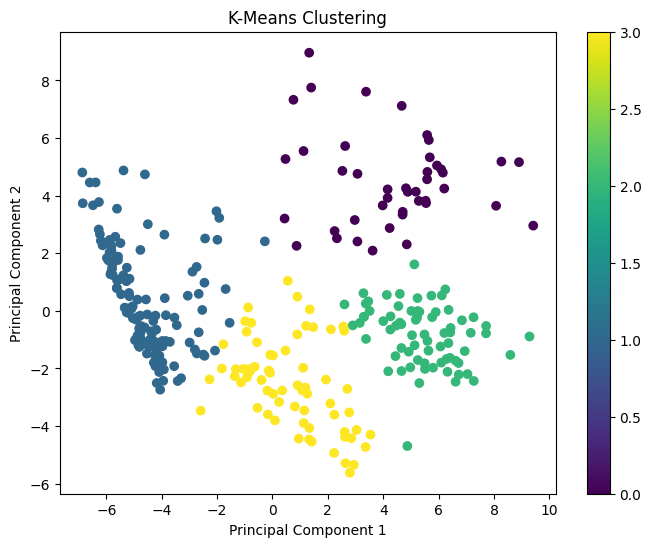

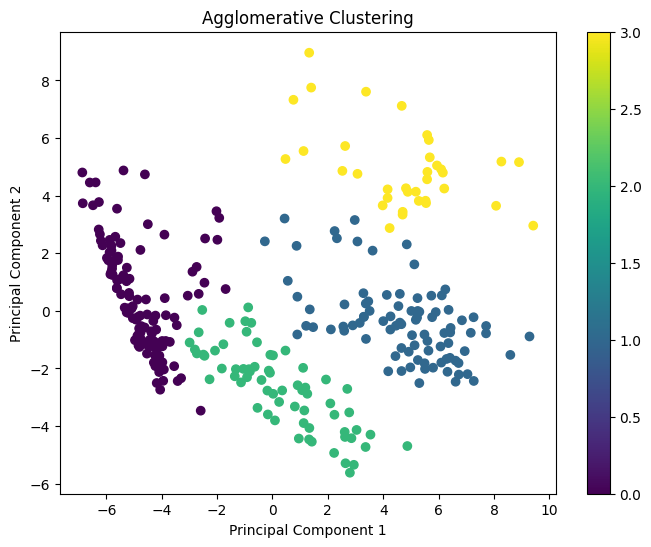

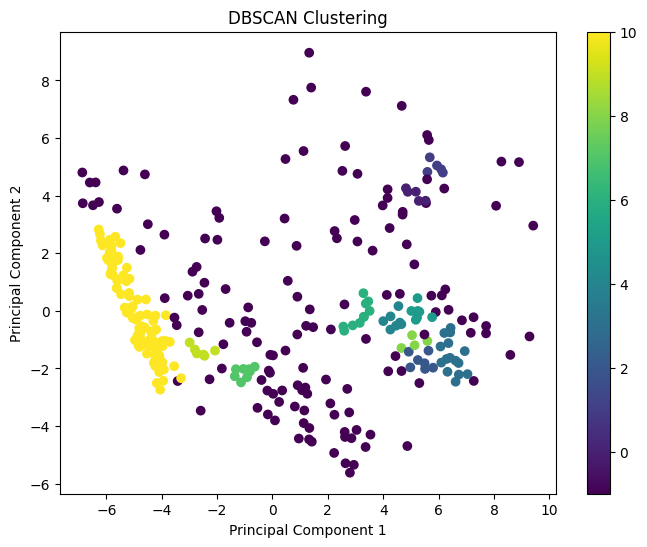

In [36]:
cleaned_df.columns = cleaned_df.columns.astype(str)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# reducing the data to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Define the number of clusters for K-Means and Agglomerative Clustering
k = 4 

# K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(reduced_data)

# aglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)
agglo_clusters = agglo.fit_predict(reduced_data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(reduced_data)

# plot
def plot_clusters(data, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_clusters(reduced_data, kmeans_clusters, 'K-Means Clustering')
plot_clusters(reduced_data, agglo_clusters, 'Agglomerative Clustering')
plot_clusters(reduced_data, dbscan_clusters, 'DBSCAN Clustering')


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

K-Means Clustering (K=4) Silhouette Score: 0.5147
Agglomerative Clustering (K=4) Silhouette Score: 0.4721
DBSCAN Clustering (K=4) Silhouette Score: -0.0833
K-Means Clustering (K=5) Silhouette Score: 0.4816
Agglomerative Clustering (K=5) Silhouette Score: 0.4332
DBSCAN Clustering (K=5) Silhouette Score: -0.0833
K-Means Clustering (K=6) Silhouette Score: 0.4812
Agglomerative Clustering (K=6) Silhouette Score: 0.4311
DBSCAN Clustering (K=6) Silhouette Score: -0.0833


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

K-Means Clustering (K=7) Silhouette Score: 0.4768
Agglomerative Clustering (K=7) Silhouette Score: 0.4547
DBSCAN Clustering (K=7) Silhouette Score: -0.0833
K-Means Clustering (K=8) Silhouette Score: 0.4689
Agglomerative Clustering (K=8) Silhouette Score: 0.4614
DBSCAN Clustering (K=8) Silhouette Score: -0.0833
K-Means Clustering (K=9) Silhouette Score: 0.4642
Agglomerative Clustering (K=9) Silhouette Score: 0.4780
DBSCAN Clustering (K=9) Silhouette Score: -0.0833


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

K-Means Clustering (K=10) Silhouette Score: 0.4554
Agglomerative Clustering (K=10) Silhouette Score: 0.4397
DBSCAN Clustering (K=10) Silhouette Score: -0.0833
Silhouette Score: 0.5146628787239593
Silhouette Score: 0.4815672728230504
Silhouette Score: 0.4811856393684203
Silhouette Score: 0.4767690923995027
Silhouette Score: 0.4688744482282912
Silhouette Score: 0.46418290738135
Silhouette Score: 0.45536959368016783
Silhouette Score: 0.4550878391893455


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

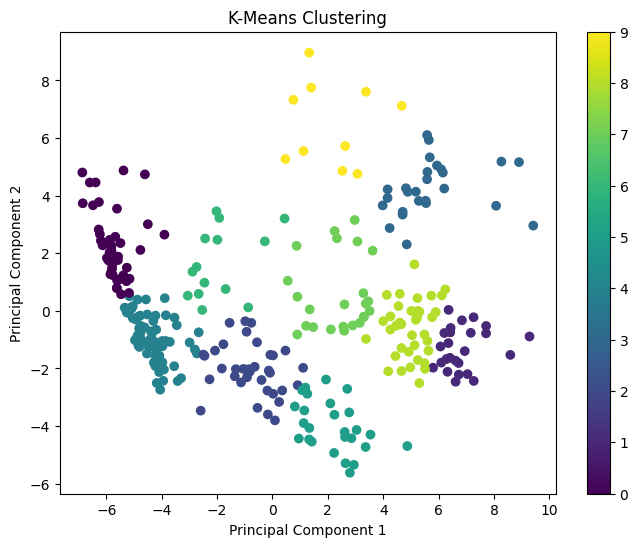

Silhouette Score: 0.43968397387841834


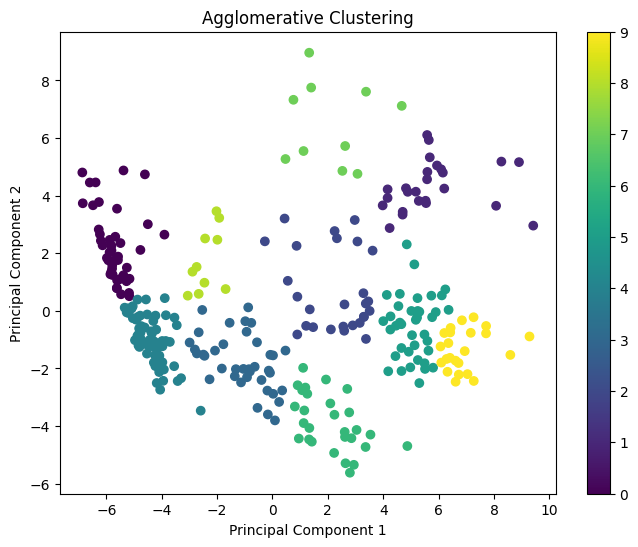

Silhouette Score: -0.08328211073570445


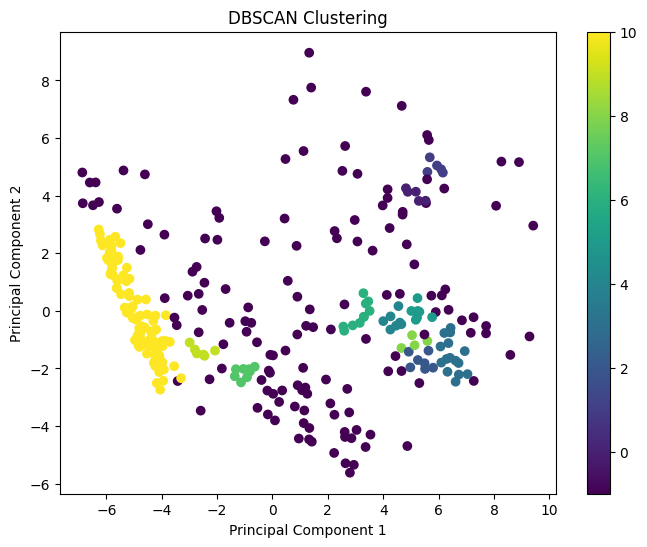

In [37]:
k_values = range(4, 11)

for k in k_values:
    algorithms = [
        KMeans(n_clusters=k, random_state=42),
        AgglomerativeClustering(n_clusters=k),
        DBSCAN(eps=0.5, min_samples=5)
    ]
    titles = ['K-Means Clustering', 'Agglomerative Clustering', 'DBSCAN Clustering']

    for algorithm, title in zip(algorithms, titles):
        clusters = algorithm.fit_predict(reduced_data)
        silhouette_avg = metrics.silhouette_score(reduced_data, clusters)
        print(f"{title} (K={k}) Silhouette Score: {silhouette_avg:.4f}")

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(reduced_data)
    evaluate_clustering(reduced_data, kmeans_clusters)
def compare_algorithms(data, algorithms, titles):
    for algorithm, title in zip(algorithms, titles):
        clusters = algorithm.fit_predict(data)
        evaluate_clustering(data, clusters)
        plot_clusters(data, clusters, title)

algorithms = [KMeans(n_clusters=k), AgglomerativeClustering(n_clusters=k), DBSCAN(eps=0.5, min_samples=5)]
titles = ['K-Means Clustering', 'Agglomerative Clustering', 'DBSCAN Clustering']
compare_algorithms(reduced_data, algorithms, titles)

In [18]:
cleaned_df['Cluster'] = kmeans_clusters

C:\Users\User\AppData\Local\Temp\ipykernel_9916\4014609608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Cluster'] = kmeans_clusters


In [19]:
cleaned_df

,STD_NO,111023,111033,111512,112063,112123,112532,113133,113233,113353,...,313113,313513,313523,313613,31373,gender_encoded,tawjihi_country_encoded,TAWJIH_GPA,tawjihi_branch_encoded,Cluster
0,313134,35.0,0.0,0.0,35.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.0,43.0,0.0,0.0,1.0,2.0,86.0,0.0,1
1,318942,0.0,0.0,0.0,51.0,50.0,51.0,50.0,55.0,55.0,...,77.0,0.0,0.0,0.0,35.0,1.0,3.0,72.0,5.0,0
2,324629,54.0,70.0,80.0,61.0,54.0,62.0,52.0,65.0,50.0,...,76.0,0.0,0.0,0.0,0.0,1.0,2.0,87.0,4.0,0
3,325080,54.0,51.0,69.0,70.0,68.0,98.0,0.0,72.0,60.0,...,78.0,0.0,0.0,67.0,0.0,1.0,2.0,81.0,1.0,0
5,325201,99.0,100.0,95.0,84.0,72.0,100.0,83.0,84.0,85.0,...,0.0,0.0,0.0,0.0,35.0,1.0,2.0,95.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,381169,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,84.0,10.0,1
351,381290,75.0,59.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,71.0,8.0,1
352,381312,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,64.0,8.0,1
353,381873,58.0,35.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,87.0,0.0,1


In [20]:
#training data
 cleaned_df.to_csv("pivot_df.csv", index=False)